# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

651

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [69]:
#I tried to change latitude and longitude coordinates and printed city name and city code
lats = np.random.uniform(low=30.000, high=200.000, size=1500)
lngs = np.random.uniform(low=-200.000, high=200.000, size=1500)
lat_lngs = zip(lats, lngs)
count=0
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    if city.country_code=="us":
        #print(str(lat_lng[0]) + ":" +str(lat_lng[1]) )
        print(city.city_name + ":" +city.country_code)
        count+=1
print(count)


bethel:us
madison:us
barrow:us
fairbanks:us
barrow:us
barrow:us
kodiak:us
barrow:us
fairbanks:us
barrow:us
nome:us
barrow:us
barrow:us
havelock:us
kapaa:us
barrow:us
barrow:us
kapaa:us
kapaa:us
kahului:us
barrow:us
barrow:us
barrow:us
barrow:us
barrow:us
barrow:us
barrow:us
lafayette:us
sturgis:us
barrow:us
barrow:us
barrow:us
barrow:us
laramie:us
barrow:us
barrow:us
barrow:us
barrow:us
brookhaven:us
barrow:us
barrow:us
nome:us
bethel:us
barrow:us
palmer:us
barrow:us
barrow:us
fortuna:us
sitka:us
barrow:us
college place:us
kapaa:us
sitka:us
barrow:us
barrow:us
barrow:us
half moon bay:us
barrow:us
barrow:us
bethel:us
bethel:us
barrow:us
nome:us
barrow:us
barrow:us
kapaa:us
bethel:us
kapaa:us
barrow:us
barrow:us
barrow:us
kahului:us
barrow:us
barrow:us
barrow:us
barrow:us
barrow:us
kapaa:us
barrow:us
south lake tahoe:us
barrow:us
lewistown:us
barrow:us
barrow:us
madisonville:us
kapaa:us
barrow:us
barrow:us
kapaa:us
barrow:us
barrow:us
palmer:us
kapaa:us
mountain home:us
lompoc:us
barrow:

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [15]:
#implementing base url and printing jsondata just to check what are the parameters we have.
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
req = requests.get(base_url + f'&q={city}')
json_data=req.json()
json_data

{'coord': {'lon': 40.0573, 'lat': 1.7471},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 85.96,
  'feels_like': 88.12,
  'temp_min': 85.96,
  'temp_max': 85.96,
  'pressure': 1007,
  'humidity': 51},
 'visibility': 10000,
 'wind': {'speed': 2.3, 'deg': 0},
 'clouds': {'all': 1},
 'dt': 1634579651,
 'sys': {'type': 1,
  'id': 2571,
  'country': 'KE',
  'sunrise': 1634526155,
  'sunset': 1634569616},
 'timezone': 10800,
 'id': 178443,
 'name': 'Wajir',
 'cod': 200}

In [123]:
#creating a function to check the parameters are present in the cities
def weather_check(json_data):
    var=("weather","coord")
    for i in  var :
        if (json_data.get(i) is None):
            return False
    if not (('speed'  in json_data['wind']) and ('country'in json_data['sys'])and('temp_max'in json_data['main']) and ('pressure' in json_data['main'])) :
        return False
    return True 

counter=0
city_weather={'city_name':[],'lat':[],'lon':[],'country':[],'max_temperature':[],'humidity':[],'wind speed':[],'Cloudiness':[]}
for city in cities:    
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
    try:
        req = requests.get(base_url + f'&q={city}')
        json_data=req.json()
        
        if json_data['cod']==200: #successive API calls.
            print('City_number:'+str(counter)+'City_name:'+ city)
            if weather_check(json_data):
                counter+=1
                city_weather['city_name'].append(city)
                city_weather['lat'].append(json_data['coord']['lat'])
                city_weather['lon'].append(json_data['coord']['lon'])
                city_weather['country'].append(json_data['sys']['country'])
                city_weather['max_temperature'].append(json_data['main']['temp_max'])
                city_weather['humidity'].append(json_data['main']['humidity'])
                city_weather['wind speed'].append(json_data['wind']['speed'])
                city_weather['Cloudiness'].append(json_data['clouds']['all'])
    except:        
        print("city not found... skipping")

City_number:0City_name:castro
City_number:1City_name:sorong
City_number:2City_name:mezhdurechenskiy
City_number:3City_name:dubasari
City_number:4City_name:sur
City_number:5City_name:oparino
City_number:6City_name:sarab
City_number:7City_name:cape town
City_number:8City_name:hofn
City_number:9City_name:dikson
City_number:10City_name:clyde river
City_number:11City_name:puerto ayora
City_number:12City_name:amderma
City_number:12City_name:bredasdorp
City_number:13City_name:bethel
City_number:14City_name:albany
City_number:15City_name:hervey bay
City_number:16City_name:batagay-alyta
City_number:17City_name:atuona
City_number:18City_name:tuktoyaktuk
City_number:19City_name:sinnamary
City_number:20City_name:westport
City_number:21City_name:porto santo
City_number:22City_name:bargal
City_number:22City_name:east london
City_number:23City_name:nantucket
City_number:24City_name:itaituba
City_number:25City_name:shatrovo
City_number:26City_name:mataura
City_number:27City_name:beeville
City_number:2

City_number:221City_name:jamestown
City_number:222City_name:rebrikha
City_number:223City_name:mys shmidta
City_number:223City_name:benghazi
City_number:224City_name:chanika
City_number:225City_name:paramonga
City_number:226City_name:avera
City_number:227City_name:zyryanka
City_number:228City_name:vitimskiy
City_number:228City_name:katesh
City_number:229City_name:okha
City_number:230City_name:karauli
City_number:231City_name:novopokrovka
City_number:232City_name:loukhi
City_number:233City_name:panzhihua
City_number:234City_name:krasnyy kut
City_number:235City_name:meulaboh
City_number:236City_name:biak
City_number:237City_name:fortuna
City_number:238City_name:talaya
City_number:239City_name:awjilah
City_number:240City_name:shchelyayur
City_number:240City_name:aguilas
City_number:241City_name:avarua
City_number:242City_name:sistranda
City_number:243City_name:barabai
City_number:244City_name:attawapiskat
City_number:244City_name:bubaque
City_number:245City_name:vaitupu
City_number:245City

City_number:440City_name:khandyga
City_number:441City_name:celestun
City_number:442City_name:el dorado
City_number:443City_name:klyuchi
City_number:444City_name:acoua
City_number:445City_name:tabas
City_number:446City_name:san quintin
City_number:447City_name:sobolevo
City_number:448City_name:smoky lake
City_number:449City_name:seabra
City_number:450City_name:flinders
City_number:451City_name:goundam
City_number:452City_name:nguiu
City_number:452City_name:san felipe
City_number:453City_name:yuzhou
City_number:454City_name:warqla
City_number:454City_name:pak phanang
City_number:455City_name:woodward
City_number:456City_name:yarmouth
City_number:457City_name:hashtrud
City_number:458City_name:yinchuan
City_number:459City_name:diapaga
City_number:460City_name:muisne
City_number:461City_name:la palma
City_number:462City_name:moerai
City_number:463City_name:peniche
City_number:464City_name:sajanan
City_number:465City_name:panguna
City_number:466City_name:ribeira brava
City_number:467City_nam

In [289]:
print(city_weather)

{'city_name': ['latung', 'santa isabel do rio negro', 'port keats', 'ushuaia', 'hilo', 'puerto ayora', 'rikitea', 'kholm-zhirkovskiy', 'hithadhoo', 'arman', 'victoria', 'new norfolk', 'weinan', 'porbandar', 'prince rupert', 'vaini', 'punta arenas', 'shiyan', 'hermanus', 'mokobeng', 'saldanha', 'jamestown', 'amapa', 'bonavista', 'busselton', 'bluff', 'mataura', 'catamarca', 'betanzos', 'ribeira grande', 'fairbanks', 'ossora', 'kavieng', 'kattivakkam', 'severo-kurilsk', 'kutum', 'yellowknife', 'cape town', 'cahors', 'airai', 'mahibadhoo', 'lagoa', 'kaitangata', 'khatanga', 'dongsheng', 'brewster', 'shingu', 'tuatapere', 'hobart', 'binzhou', 'arrecife', 'manzhouli', 'taywarah', 'sao felix do xingu', 'hollins', 'gornopravdinsk', 'mount gambier', 'halifax', 'chokurdakh', 'olafsvik', 'kamenka', 'smithers', 'wuning', 'arys', 'akdepe', 'honiara', 'te anau', 'pisco', 'vestmannaeyjar', 'high level', 'minas', 'marawi', 'saint george', 'georgetown', 'sao joao da barra', 'faanui', 'kodiak', 'barao 

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [16]:
api_df=pd.DataFrame(city_weather)
api_df.head()

,city_name,lat,lon,country,max_temperature,humidity,wind speed,Cloudiness
0,castro,-24.7911,-50.0119,BR,56.26,96,5.61,100
1,sorong,-0.8833,131.2500,ID,79.41,84,4.23,90
2,mezhdurechenskiy,59.6000,65.9333,RU,44.38,91,7.56,100
3,dubasari,47.2631,29.1608,MD,51.30,54,5.97,90
4,sur,22.5667,59.5289,OM,82.45,43,7.34,0


In [291]:
#exporting city data into csv file
csv_file=api_df.to_csv('city_weather.csv',index=False)

In [17]:
api_df.count()

city_name          584
lat                584
lon                584
country            584
max_temperature    584
humidity           584
wind speed         584
Cloudiness         584
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

# Latitude vs. Temperature Matplotlib Plot

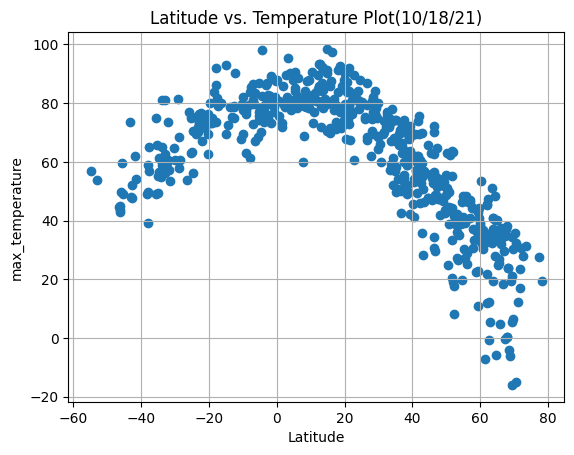

In [20]:
from datetime import date
plt.style.use("default")
fig,ax=plt.subplots()
ax.scatter(city_weather['lat'],city_weather['max_temperature'])
ax.set_xlabel("Latitude")
ax.set_ylabel("max_temperature")
date1=date.today()
ax.set_title("Latitude vs. Temperature Plot("+date1.strftime("%m/%d/%y")+")")
plt.grid(True)
fig.savefig('Lat_vs_Temp_Plot.png')
plt.show()

# Latitude vs.Humidity Matplotlib Plot

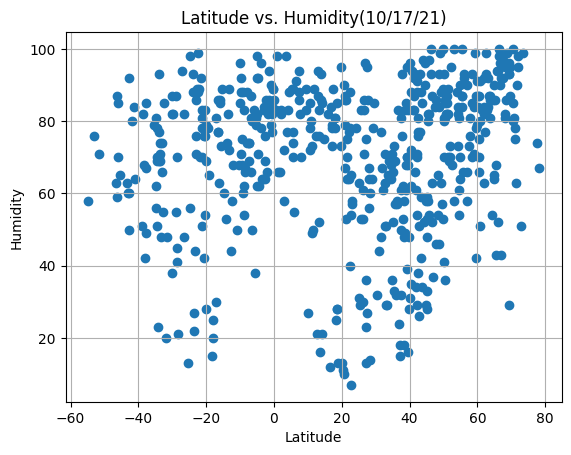

In [294]:
plt.style.use("default")
fig,ax=plt.subplots()
ax.scatter(city_weather['lat'],city_weather['humidity'])
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity")
date1=date.today()
ax.set_title("Latitude vs. Humidity("+date1.strftime("%m/%d/%y")+")")
plt.grid(True)
fig.savefig('Lat_vs_Humidity.png')
plt.show()

# Latitude vs Cloudiness Matplotlib Plot

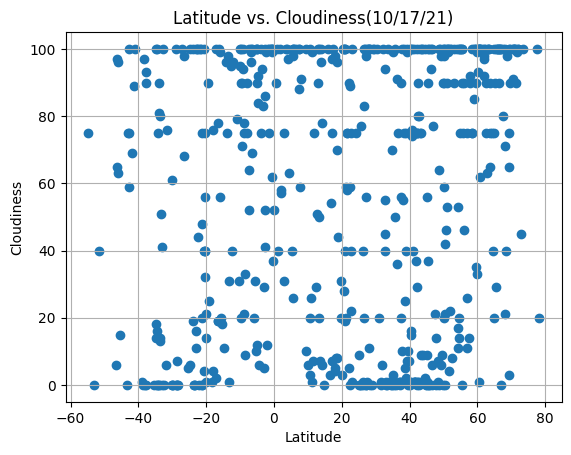

In [295]:
plt.style.use("default")
fig,ax=plt.subplots()
ax.scatter(city_weather['lat'],city_weather['Cloudiness'])
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness")
date1=date.today()
ax.set_title("Latitude vs. Cloudiness("+date1.strftime("%m/%d/%y")+")")
plt.grid(True)
fig.savefig('Lat_vs_Cloudiness.png')
plt.show()

# Latitude vs Wind Speed Matplotlib Plot

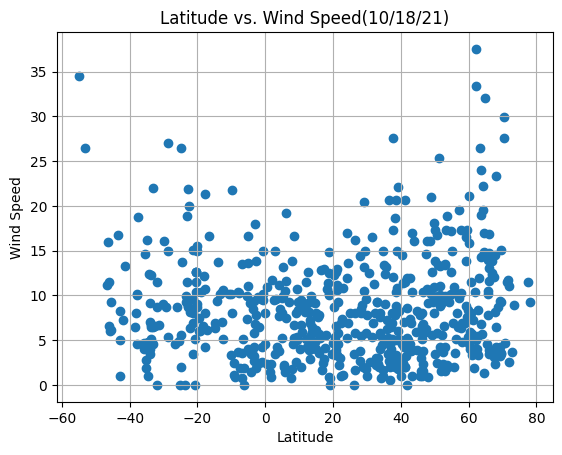

In [43]:
plt.style.use("default")
fig,ax=plt.subplots()
ax.scatter(city_weather['lat'],city_weather['wind speed'])
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed")
date1=date.today()
ax.set_title("Latitude vs. Wind Speed("+date1.strftime("%m/%d/%y")+")")
plt.grid(True)
fig.savefig('Lat_vs_Wind_Speed.png')
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

# Latitude vs Temperature Seaborn Plot

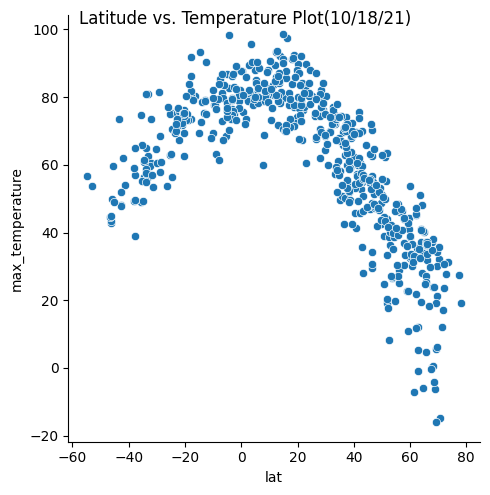

In [49]:
import seaborn as sns
g=sns.relplot(x='lat',y='max_temperature',data=api_df,kind='scatter')
date1=date.today()
g.fig.suptitle("Latitude vs. Temperature Plot("+date1.strftime("%m/%d/%y")+")")
plt.show()
g.savefig('Lat_vs_Temp_Seaborn.png')


# Latitude vs Humidity Seaborn plot

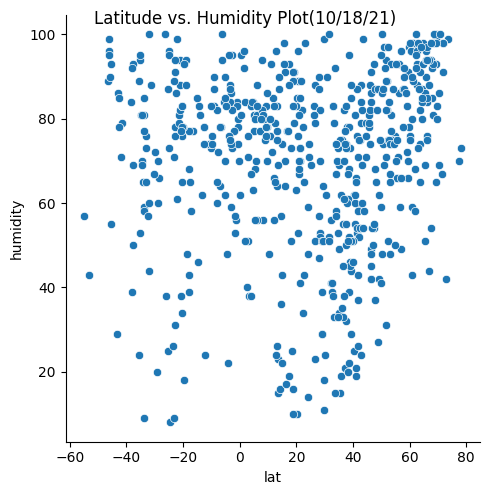

In [50]:
g=sns.relplot(x='lat',y='humidity',data=api_df,kind='scatter')
date1=date.today()
g.fig.suptitle("Latitude vs. Humidity Plot("+date1.strftime("%m/%d/%y")+")")
plt.show()
g.savefig('Lat_vs_Humidity_Seaborn.png')

# Latitude vs Cloudiness Seaborn Plot

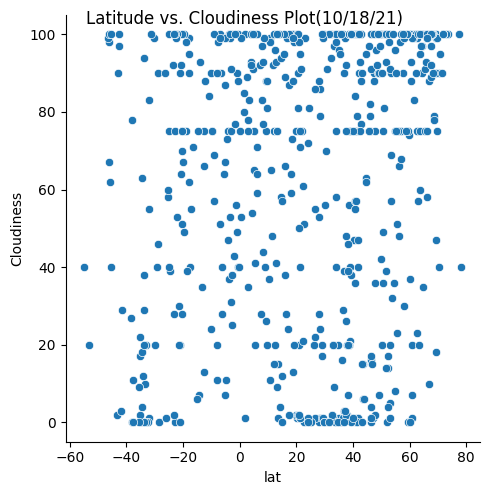

In [51]:
g=sns.relplot(x='lat',y='Cloudiness',data=api_df,kind='scatter')
date1=date.today()
g.fig.suptitle("Latitude vs. Cloudiness Plot("+date1.strftime("%m/%d/%y")+")")
plt.show()
g.savefig('Lat_vs_Cloudiness_Seaborn.png')

# Latitude vs Wind Speed Seaborn Plot

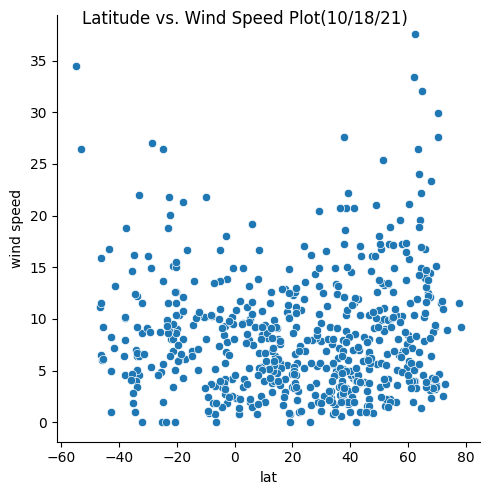

In [52]:
g=sns.relplot(x='lat',y='wind speed',data=api_df,kind='scatter')
date1=date.today()
g.fig.suptitle("Latitude vs. Wind Speed Plot("+date1.strftime("%m/%d/%y")+")")
plt.show()
g.savefig('Lat_vs_WindSpeed_Seaborn.png')

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

In [ ]:
#I have created a python script to visualize weather for more than 500 cities randomly by changing 
#latitude and longitude coordinates.
#We have taken latitude value for this analysis is -90.000 to 90.000.From the plot we can say, there is a 
#maximum temperature(above 80s) in cities which are in latitude 0 to 20.Some of the cities latitude range from 60to80
#temperature goes less than 0.
#As temperature and humidity are related with each other, I can say from the plot that the cities which are in latitude 60-100
#have high humidity than others.
#Most of the cities wind speed is less than 10.

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

In [136]:
#optional
#OpenWeather One Call API.
base_url= "https://api.openweathermap.org/data/2.5/onecall?lat=33.44&lon=-94.04&exclude=hourly,daily&appid=" + api_key
req=requests.get(base_url)
data = req.json()
data

{'lat': 33.44,
 'lon': -94.04,
 'timezone': 'America/Chicago',
 'timezone_offset': -18000,
 'current': {'dt': 1634605403,
  'sunrise': 1634559790,
  'sunset': 1634600339,
  'temp': 290.65,
  'feels_like': 289.79,
  'pressure': 1019,
  'humidity': 51,
  'dew_point': 280.41,
  'uvi': 0,
  'clouds': 1,
  'visibility': 10000,
  'wind_speed': 0.89,
  'wind_deg': 90,
  'wind_gust': 2.24,
  'weather': [{'id': 800,
    'main': 'Clear',
    'description': 'clear sky',
    'icon': '01n'}]},
 'minutely': [{'dt': 1634605440, 'precipitation': 0},
  {'dt': 1634605500, 'precipitation': 0},
  {'dt': 1634605560, 'precipitation': 0},
  {'dt': 1634605620, 'precipitation': 0},
  {'dt': 1634605680, 'precipitation': 0},
  {'dt': 1634605740, 'precipitation': 0},
  {'dt': 1634605800, 'precipitation': 0},
  {'dt': 1634605860, 'precipitation': 0},
  {'dt': 1634605920, 'precipitation': 0},
  {'dt': 1634605980, 'precipitation': 0},
  {'dt': 1634606040, 'precipitation': 0},
  {'dt': 1634606100, 'precipitation': 0}

In [35]:
#from api_keys import api_key
#city_onecall={'city_name':[],'lat':[],'lon':[],'pressure':[],'humidity':[],'wind speed':[],'sunrise':[]}
base_url= "https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&appid=" + api_key
#try:
req=requests.get(base_url
data = req.json()
city_onecall['city_name'].append("city")
city_onecall['lat'].append(data['lat'])
city_onecall['lon'].append(data['lon'])
city_onecall['pressure'].append(data['current']['pressure'])
city_onecall['humidity'].append(data['current']['humidity'])
city_onecall['wind speed'].append(data['current']['wind_speed'])
city_onecall['sunrise'].append(data['current']['sunrise'])

{'cod': 429,
 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}

In [33]:
base_url= "https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&appid=" + api_key
req=requests.get(base_url)
data = req.json()
data

{'cod': 429,
 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}

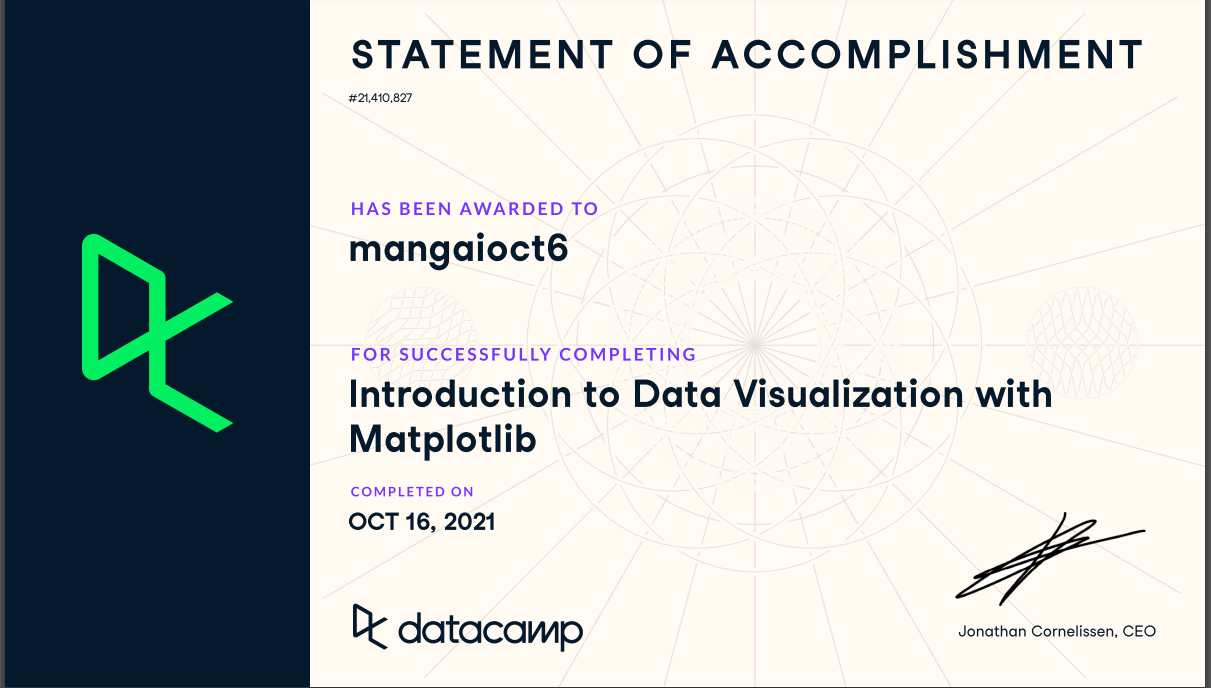

![](![matplotlib.png](attachment:matplotlib.png))

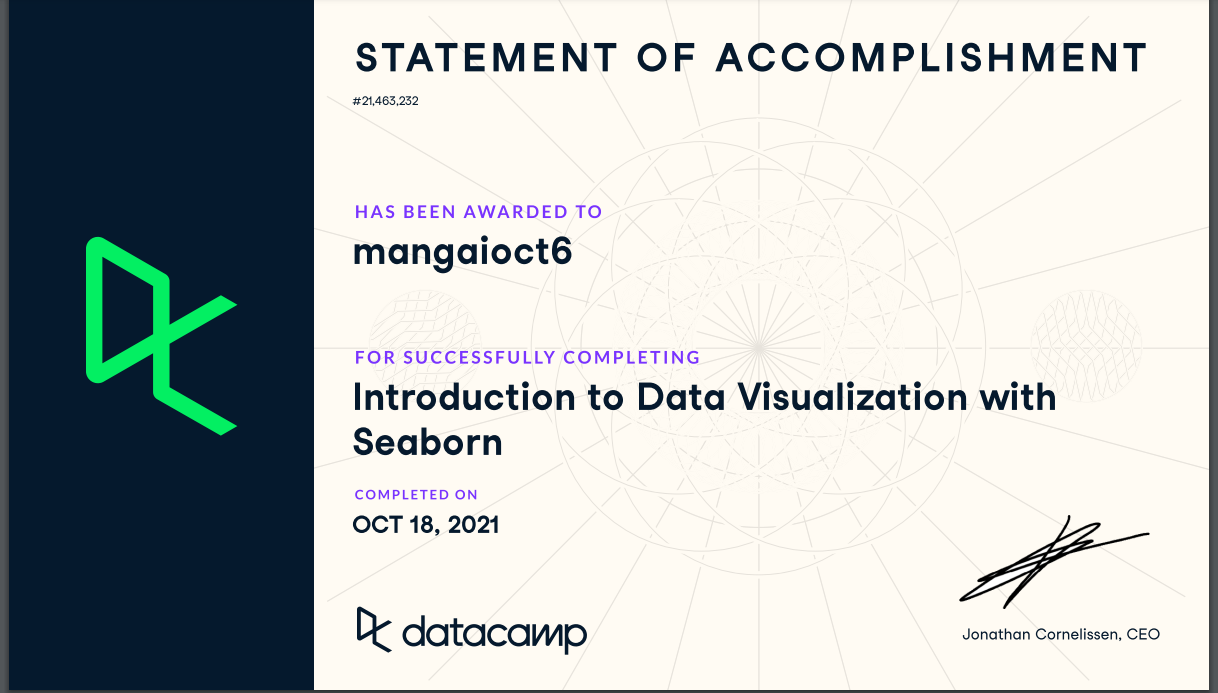